In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pickle

### Loading the data in the form of DataFrame

In [2]:
Data = pd.read_csv("Gender_Data.csv")

In [3]:
Data

,Name,Gender
0,Aaban,0
1,Aabharan,0
2,Aabhas,0
3,Aabhat,0
4,Aabheer,0
...,...,...
53977,Zumathy,1
53978,Zurika,1
53979,Zuruthi,1
53980,Zuruthika,1


#### Total number of Data points we have is 53982

In [4]:
Data["Name"].value_counts()

Balbir        2
Rishita       2
Harjit        2
Giaan         2
Gemine        2
             ..
Nilujan       1
Anamiva       1
Muhunthesh    1
Karnish       1
Shrikant      1
Name: Name, Length: 53925, dtype: int64

#### We can see that there are some names which are clssified both as male and also as female. 57 Such names are there.

In [5]:
Data["Gender"].value_counts()

0    29014
1    24968
Name: Gender, dtype: int64

#### This gives us the count of the data points in each class (Male and Female). Note that 0 refers to Male and 1 refers to Female

### Now lets get some insights from the data

In [6]:
ini_male = {i:0 for i in string.ascii_uppercase}
ini_female = {i:0 for i in string.ascii_uppercase}
end_male = {i:0 for i in string.ascii_lowercase}
end_female = {i:0 for i in string.ascii_lowercase}

for i in range(len(Data)):
    if(Data['Gender'][i] == 0):
#         Data.iloc[i] = {'Name':Data['Name'][i].capitalize() }
        Data['Name'][i] = Data['Name'][i].capitalize()
        ini_male[Data['Name'][i][0]] += 1
        end_male[Data['Name'][i][-1]] += 1
    elif(Data['Gender'][i] == 1):
        Data['Name'][i] = Data['Name'][i].capitalize()
        ini_female[Data['Name'][i][0]] += 1
        end_female[Data['Name'][i][-1]] += 1

<ipython-input-6-aa9bf71ab273>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Name'][i] = Data['Name'][i].capitalize()
<ipython-input-6-aa9bf71ab273>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Name'][i] = Data['Name'][i].capitalize()


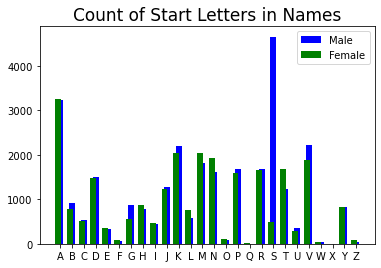

In [7]:
X = np.arange(len(ini_male))
ax = plt.subplot(111)
ax.bar(X, ini_male.values(), width=0.5, color='b', align='center')
ax.bar(X-0.2, ini_female.values(), width=0.5, color='g', align='center')
ax.legend(('Male','Female'))
plt.xticks(X, ini_male.keys())
plt.title("Count of Start Letters in Names", fontsize=17)
plt.show()

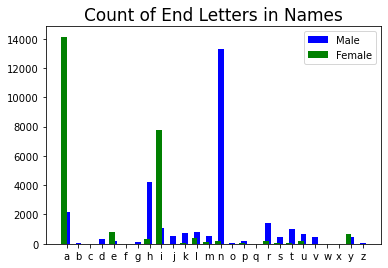

In [8]:
X = np.arange(len(end_male))
ax = plt.subplot(111)
ax.bar(X, end_male.values(), width=0.5, color='b', align='center')
ax.bar(X-0.2, end_female.values(), width=0.5, color='g', align='center')
ax.legend(('Male','Female'))
plt.xticks(X, end_male.keys())
plt.title("Count of End Letters in Names", fontsize=17)
plt.show()

### As we can see, the start and end letters play a significant role in classifying that, whether it's a male name or a female name. We expect this kind of information will be covered by our classifier also.

## Dividing the Dataset into Train and Test sets

In [9]:
newData = Data.sample(frac=1).reset_index(drop=True)
newData

,Name,Gender
0,Gobigeshwar,0
1,Vritee,1
2,Hansini,1
3,Chitharaman,0
4,Hailley,1
...,...,...
53977,Netharshan,0
53978,Wamil,1
53979,Sangeetha,1
53980,Negan,0


#### Choosing 80% data as Train and remaining as Test.

In [10]:
msk = np.random.rand(len(newData)) < 0.8
msk

array([False,  True,  True, ...,  True,  True,  True])

In [11]:
train = newData[msk]
test = newData[~msk]

#### Train Set

In [12]:
train

,Name,Gender
1,Vritee,1
2,Hansini,1
4,Hailley,1
5,Kaanchi,1
7,Omkrish,0
...,...,...
53977,Netharshan,0
53978,Wamil,1
53979,Sangeetha,1
53980,Negan,0


#### Test Set

In [13]:
test

,Name,Gender
0,Gobigeshwar,0
3,Chitharaman,0
6,Rajithan,0
8,Oviyakoomahal,1
10,Prabhupriya,1
...,...,...
53953,Jasanth,0
53961,Letchumi,1
53967,Asruthi,1
53969,Tvarika,1


#### Number of data points in each class for Test and Train dataset

In [14]:
train["Gender"].value_counts()

0    23204
1    20003
Name: Gender, dtype: int64

In [15]:
test["Gender"].value_counts()

0    5810
1    4965
Name: Gender, dtype: int64

### Dividing the sets into input and target sets

In [16]:
train_input = train[['Name']]
train_target = train[['Gender']]
test_input = test[['Name']]
test_target = test[['Gender']]

### Converting DataFrame to Numpy Arrays

In [17]:
train_input = train_input.to_numpy().flatten()
train_target = train_target.to_numpy().flatten()
test_input = test_input.to_numpy().flatten()
test_target = test_target.to_numpy().flatten()

In [18]:
print(train_input)
print(train_target)
print(test_input)
print(test_target)

['Vritee' 'Hansini' 'Hailley' ... 'Sangeetha' 'Negan' 'Nesamani']
[1 1 1 ... 1 0 0]
['Gobigeshwar' 'Chitharaman' 'Rajithan' ... 'Asruthi' 'Tvarika' 'Naanak']
[0 0 0 ... 1 1 0]


### Converting string of input data as One hot encoded vector of size 26*26
#### I am assuming that the maximum name length can only be of size 25 (This assumption may not always be true but it is true for the given dataset. I assumed this to simplify the computation). We can increase the size accordingly.

In [19]:
def oneHot25(data):
    n_letters = len(string.ascii_lowercase)+len(string.ascii_uppercase)
    vector = np.zeros((len(data), 25, n_letters))
    for j in range(len(data)):
        for i in range(len(data[j])):
            if (data[j][i].isupper()):
                vector[j][i][ord(data[j][i])-65] = 1
            else:
                vector[j][i][26 + ord(data[j][i])-97] = 1
    return(vector)

In [20]:
onehot_train_input = oneHot25(train_input)
onehot_test_input = oneHot25(test_input)

In [21]:
onehot_train_input.shape

(43207, 25, 52)

In [22]:
onehot_test_input.shape

(10775, 25, 52)

### Standardization of Input
#### We will standardize our input to decrase the range and to reach the minimum point in the loss function fast

In [23]:
sc_X = StandardScaler()
nsamples, nx, ny = onehot_train_input.shape
X_train = sc_X.fit_transform(onehot_train_input.reshape((nsamples,nx*ny)))
nsamples, nx, ny = onehot_test_input.shape
X_test = sc_X.transform(onehot_test_input.reshape((nsamples,nx*ny)))

# Classification
#### I am using decision trees and the classifier as I have padded the input data to a length of 25. Most of the names have a length around 6, so the remaining dimensions will work as noise for the classifier and will affect the performance of many classifiers like Neural Network-based classifiers, which is not a case in the decision tree as it will be divided into different branches based on the values in each dimension.
#### If we want to use Neural Network-based classifiers, we have to do more preprocessing of the data, such as tokenization, to get good results.

## Gradient Boosting Classifier

In [24]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5, random_state=0)
start_time = time.time()
clf.fit(X_train,train_target)
end_time = time.time()

#### Classification Report of Gradient Boosting Classifier on Train dataset

In [25]:
target_names = ['Male', 'Female']
Y_Pred_train = clf.predict(X_train)
print("Classification Report of Gradient Boosting Classifier on Train dataset")
print(classification_report(train_target, Y_Pred_train, target_names=target_names))

Classification Report of Gradient Boosting Classifier on Train dataset
              precision    recall  f1-score   support

        Male       0.95      0.95      0.95     23204
      Female       0.95      0.95      0.95     20003

    accuracy                           0.95     43207
   macro avg       0.95      0.95      0.95     43207
weighted avg       0.95      0.95      0.95     43207



In [26]:
Y_Pred =  clf.predict(X_test)
cm = confusion_matrix(test_target, Y_Pred)
print("Confusion Matrix on test data:",cm)

Confusion Matrix on test data: [[5276  534]
 [ 501 4464]]


#### Accuracy on test data

In [27]:
print("Accuracy on test data with Gradient Boosting Classifier is", (cm[0][0]+cm[1][1])*100/sum(sum(cm)),"%")
print("Time taken to train Gradient Boosting Classifier is",(end_time -start_time)/60,"minutes")

Accuracy on test data with Gradient Boosting Classifier is 90.39443155452436 %
Time taken to train Gradient Boosting Classifier is 5.846925763289134 minutes


#### Classification Report of Gradient Boosting Classifier on Test dataset

In [28]:
target_names = ['Male', 'Female']
print("Classification Report of Gradient Boosting Classifier on Test dataset")
print(classification_report(test_target, Y_Pred, target_names=target_names))

Classification Report of Gradient Boosting Classifier on Test dataset
              precision    recall  f1-score   support

        Male       0.91      0.91      0.91      5810
      Female       0.89      0.90      0.90      4965

    accuracy                           0.90     10775
   macro avg       0.90      0.90      0.90     10775
weighted avg       0.90      0.90      0.90     10775



## Random Forest Classifier

In [29]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier.fit(X_train,train_target)
end_time = time.time()
target_names = ['Male', 'Female']
Y_Pred_train = classifier.predict(X_train)


#### Classification Report of Random Forest Classifier on Training dataset

In [30]:
print("Classification Report of Random Forest Classifier on Train dataset")
print(classification_report(train_target, Y_Pred_train, target_names=target_names))

Classification Report of Random Forest Classifier on Train dataset
              precision    recall  f1-score   support

        Male       1.00      1.00      1.00     23204
      Female       1.00      1.00      1.00     20003

    accuracy                           1.00     43207
   macro avg       1.00      1.00      1.00     43207
weighted avg       1.00      1.00      1.00     43207



In [31]:
Y_Pred = classifier.predict(X_test)

#### Confusion Matrix on test data

In [32]:
cm = confusion_matrix(test_target, Y_Pred)
print("Confusion Matrix on test data:",cm)

Confusion Matrix on test data: [[5170  640]
 [ 551 4414]]


#### Accuracy on test data

In [33]:
print("Accuracy on test data with Gradient Boosting Classifier is", (cm[0][0]+cm[1][1])*100/sum(sum(cm)),"%")
print("Time taken to train Random Forest Classifier is",(end_time -start_time)/60,"minutes")

Accuracy on test data with Gradient Boosting Classifier is 88.94663573085847 %
Time taken to train Random Forest Classifier is 0.9847150643666586 minutes


#### Classification Report of Random Forest Classifier on Test data

In [34]:
target_names = ['Male', 'Female']
print("Classification Report of Random Forest Classifier on Test dataset")
print(classification_report(test_target, Y_Pred, target_names=target_names))

Classification Report of Random Forest Classifier on Test dataset
              precision    recall  f1-score   support

        Male       0.90      0.89      0.90      5810
      Female       0.87      0.89      0.88      4965

    accuracy                           0.89     10775
   macro avg       0.89      0.89      0.89     10775
weighted avg       0.89      0.89      0.89     10775



# Conclusion

#### As we can see that the accuracy on the test dataset given by Random Forest is 88.665, which is less than the accuracy of 90.54 given by Gradient Boosting Classifier, but the time taken for Random Forest is much less than that of the Gradient Boosting algorithm. Therefore the ideal classifier for this dataset is Random Forest.

#### We can still do more hyperparameter tuning to improve the performance. I experimented with the number of weak classifiers used; this is the best performance that we can get with the same hyperparameter.

# Testing on user given name

In [35]:
def find_gender(a):
    target_names = ['boy', 'girl']
    a_new = oneHot25([a])
    nsamples,nx,ny = a_new.shape
    input_name = sc_X.transform(a_new.reshape((nsamples,nx*ny)))
    Y_Pred = classifier.predict(input_name)
    return(target_names[Y_Pred[0]])

In [36]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: annu
annu is a girl name


In [37]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: Anurag
Anurag is a boy name


In [38]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: h
h is a boy name


In [39]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: n
n is a boy name


In [40]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: m
m is a boy name


In [41]:
name = input("Enter the name: ")
print('{} is a {} name'.format(name,find_gender(name)))

Enter the name: n
n is a boy name


# Observations

#### 1) The behavior of the model is similar as we saw in the bar graph, that initials and end letters of a name play a very important role in gender prediction.
#### 2) Names ending with 'i' and 'a' are predicted as a girl, and names ending with 'n' are predicted as a boy.
#### 3) Also, the upper and lower case of the initial letter plays an important role as we have trained our model with the initials in the upper case. To solve this problem, we can convert the initial letter in the upper case of the user's given name.

In [42]:
pkl_filename = "random_forest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)

In [43]:
pkl_filename = "scaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sc_X, file)